<a href="https://colab.research.google.com/github/MANYI-anewbird/775/blob/main/assignment4_uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 3**

Name: Manyi Hong


### 1. Read the HBS Case. What is the difference between Uber POOL and Express POOL? No more than two sentences.

Compare with Uber POOL, Express POOL first requires customers to walk a short distance to the pick-up point to save time while Uber POOL provide door-to-door service. Secondly, Express POOL requires customers for a short-time waiting while Uber POOL provide no-time-wait service.

### 2. How did Uber use surveys in designing Uber Express Pool? No more than two sentences.


Uber conducted conjoint surveys to assess customers' sensitivity to different variables, including waiting time, walking distance, and price. These surveys provided a structured way to understand customers' behaviors to trade off convenience for cost savings, enabling Uber to develop a pricing calculator that predicted the acceptable price that gained the best benefits.

### 3. Suppose Uber was considering a new algorithm to recommend ride destinations in the app. Which type of research strategy should they use (A/B Test, Switchback, Synthetic Control)? No more than two sentences.


Uber should use an A/B Test to evaluate for this method allows for a randomized comparison between a control group (existing algorithm) and a treatment group (new algorithm). This approach is a direct measurement of whether the new algorithm has a positive impact on user behavior, such as selection rates and engagement.

###  4. Create two new columns in the dataset that represent the total number of trips for both pool products and the profit from these products.

Note, the data is in the data folder and is called `wait_time_switchback_3.csv`



In [23]:
import numpy as np
import pandas as pd

df_wait = pd.read_csv('/content/wait_time_switchback_3.csv')

df_wait['total_trips'] = df_wait['trips_pool'] + df_wait['trips_express_pool']
df_wait['profit'] = df_wait['revenue'] - df_wait['total_driver_payout_sr']
df_wait.head()

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express_pool,rider_cancellations,total_driver_payout_sr,total_matches_sr,total_double_matches_sr,revenue,total_trips,profit
0,Boston,2/19/18 7:00,2 mins,False,True,1417,3252,256,34459.41163,3365,1479,46041.85585,4669,11582.44422
1,Boston,2/19/18 9:40,5 mins,True,False,1462,2364,201,29770.34982,2292,1279,32174.38133,3826,2404.03151
2,Boston,2/19/18 12:20,2 mins,False,False,1360,2189,115,27446.36736,2288,957,31042.59758,3549,3596.23022
3,Boston,2/19/18 15:00,5 mins,True,True,1977,3580,356,44992.45299,4040,2029,53747.43785,5557,8754.98486
4,Boston,2/19/18 17:40,2 mins,False,False,1368,2575,187,27582.95530,2193,975,32799.79836,3943,5216.84306


###  5. Plot the average number of trips as a function of the time of the day. Describe a reason why this pattern exists (no more than 2 sentences). (20 points)


<ipython-input-24-0a12024fec2f>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_wait['hour'] = pd.to_datetime(df_wait['period_start']).dt.hour


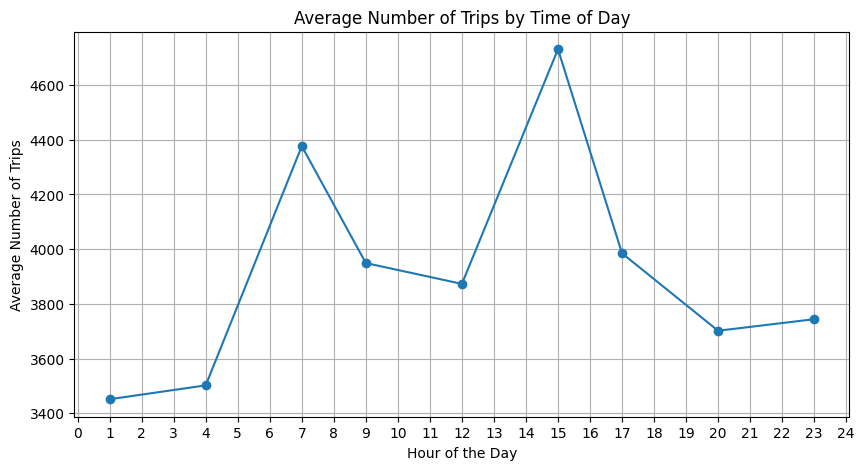

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df_wait['hour'] = pd.to_datetime(df_wait['period_start']).dt.hour
avg_trips_by_hour = df_wait.groupby('hour')['total_trips'].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_trips_by_hour.index, avg_trips_by_hour.values, marker='o', linestyle='-')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Trips")
plt.title("Average Number of Trips by Time of Day")
plt.xticks(range(0, 25))
plt.grid(True)
plt.show()


The trips peaks  isin the morning (6-8 AM) and afternoon 15 pm, reflecting commuter travel patterns as customer is on the way to and return from work or school, this is usually the time the companies/schools requires workers to start work or allow to get off work. The midday drop and late-night decline occur because demand is lower for people are at the companies/schools or home.

###  6. Conduct a regression analysis of the experiment (considering the outcomes: revenue, total_driver_payout_sr, rider_cancellations, total_trips). Make sure to think carefully about the correct regression specification. The regression output should be easy to read, so use ‘stargazer’. What do you learn in words from this regression analysis (no more than 5 sentences but it can be less)?


In [25]:
!pip install stargazer


In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer


fit_covariate_treat= smf.ols('revenue ~ total_trips + total_driver_payout_sr +rider_cancellations',data=df_wait).fit(cov_type='HC1')
Stargazer([fit_covariate_treat])

01 `total_trips` has a significant positive effect on `revenue` with coefficient = 7.767 and p<0.01, it's easy to understand that more trips has more transaction then increase the sales and revenue.

02 `total_driver_payout_sr` also has a significant positive effect on revenue with coefficient = 0.221 and p<0.01, higher driver payouts means more trips and transactions, then they are correlated with higher revenue.

03 `rider_cancellations` has a significant positive impact on revenue, with a coefficient of 30.302 and p<0.01. This may be because cancellations often have a fee. Additionally, customers tend to cancel because of a  long wait times or when drivers are far away, which can help reduce inefficient trips. Fewer inefficient trips mean drivers spend less time on unproductive rides and have more opportunities to take higher-value, efficient orders.

###  7. One of your data scientists suggests that the optimal wait time may differ by whether it’s a commuting period. Test whether the effects of a 5 minute wait period on total trips and cancelations differ by whether it’s a commuting period (the column 'commute'). Which policy works better during commute times? (10 points)
